### Development and Implementation of AI for Moderating the CONSUL Platform

# Argument Clustering

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Example dataset of comments (expanded dataset)
comments = [
    "I support the new park construction.",
    "The new park is a waste of money.",
    "We need better public transportation.",
    "Public transportation improvements are necessary.",
    "The park will provide a green space for families.",
    "Investing in public transit will reduce traffic.",
    "I believe the park project is beneficial for the community.",
    "More buses and trains are essential for the city.",
    "Green spaces are important for mental health.",
    "Public transportation needs more funding.",
    "The park will attract tourists.",
    "Better public transport can improve air quality.",
    "Park construction is a long-term investment.",
    "Public transport infrastructure needs upgrading.",
    "The park project is too expensive.",
    "More funds should be allocated to public transportation.",
    "The new park will be a waste of resources.",
    "Improved transportation will benefit everyone.",
    "We should prioritize public transit over parks.",
    "A new park will enhance the city's image."
]

# Vectorizing comments
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# Clustering comments
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Clustering results
clusters = kmeans.labels_
comments_df = pd.DataFrame({'comment': comments, 'cluster': clusters})
print(comments_df)


                                              comment  cluster
0                I support the new park construction.        0
1                   The new park is a waste of money.        0
2               We need better public transportation.        1
3   Public transportation improvements are necessary.        1
4   The park will provide a green space for families.        0
5    Investing in public transit will reduce traffic.        1
6   I believe the park project is beneficial for t...        0
7   More buses and trains are essential for the city.        2
8       Green spaces are important for mental health.        0
9           Public transportation needs more funding.        1
10                    The park will attract tourists.        0
11   Better public transport can improve air quality.        1
12       Park construction is a long-term investment.        0
13   Public transport infrastructure needs upgrading.        1
14                 The park project is too expensive.  

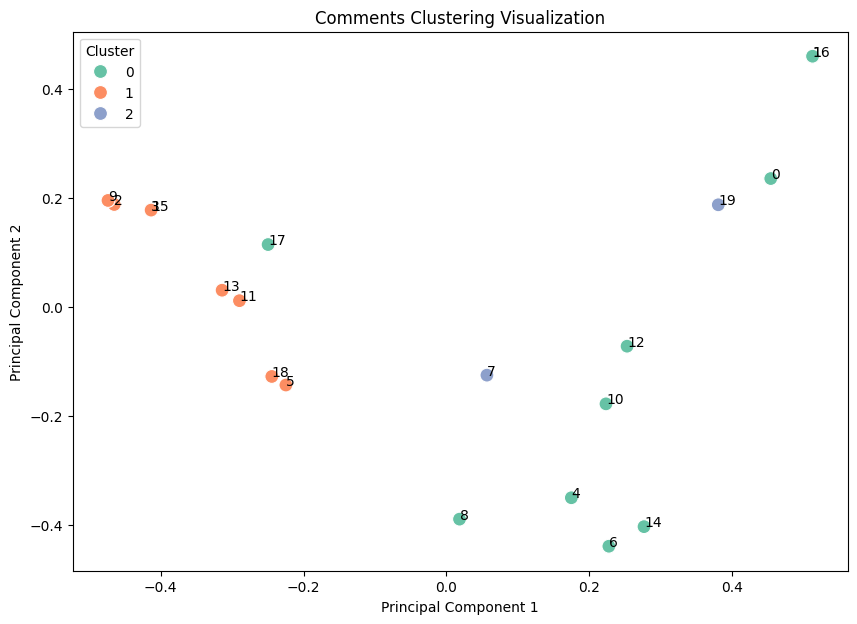

In [2]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

# Example dataset of comments (expanded dataset)
comments = [
    "I support the new park construction.",
    "The new park is a waste of money.",
    "We need better public transportation.",
    "Public transportation improvements are necessary.",
    "The park will provide a green space for families.",
    "Investing in public transit will reduce traffic.",
    "I believe the park project is beneficial for the community.",
    "More buses and trains are essential for the city.",
    "Green spaces are important for mental health.",
    "Public transportation needs more funding.",
    "The park will attract tourists.",
    "Better public transport can improve air quality.",
    "Park construction is a long-term investment.",
    "Public transport infrastructure needs upgrading.",
    "The park project is too expensive.",
    "More funds should be allocated to public transportation.",
    "The new park will be a waste of resources.",
    "Improved transportation will benefit everyone.",
    "We should prioritize public transit over parks.",
    "A new park will enhance the city's image."
]

# Vectorizing comments
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# Clustering comments
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Clustering results
clusters = kmeans.labels_
comments_df = pd.DataFrame({'comment': comments, 'cluster': clusters})

# PCA for 2D visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

# Creating a DataFrame with PCA results and clusters
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
pca_df['cluster'] = clusters
pca_df['comment'] = comments

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='principal_component_1', y='principal_component_2', hue='cluster', palette='Set2', s=100)
for i in range(pca_df.shape[0]):
    plt.text(pca_df.principal_component_1[i], pca_df.principal_component_2[i], str(i))
plt.title('Comments Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


/var/folders/24/vp659y5x50l6_8w8b4cmxrjh0000gn/T/ipykernel_11202/303598414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=comments_df, palette='Set2')


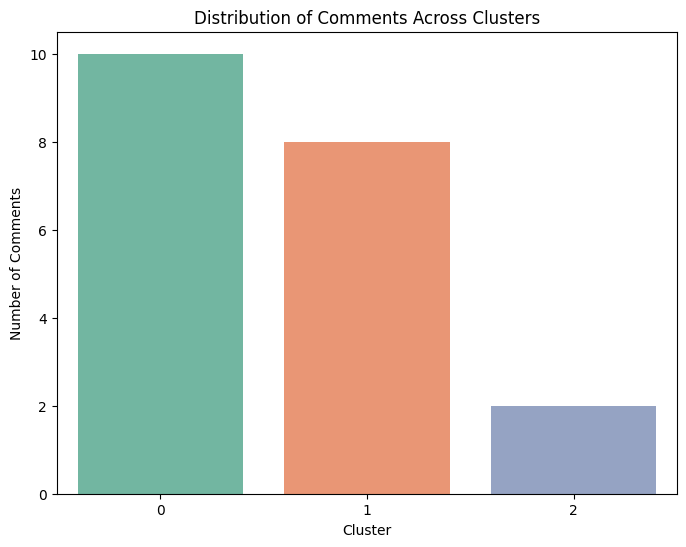

In [3]:
# Plot 1: Distribution of Comments Across Clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=comments_df, palette='Set2')
plt.title('Distribution of Comments Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Comments')
plt.show()

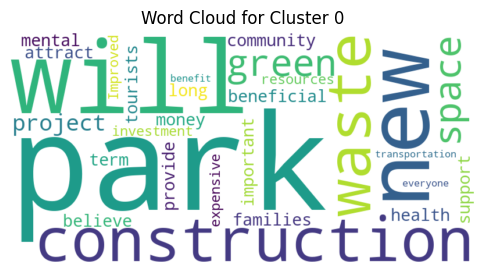

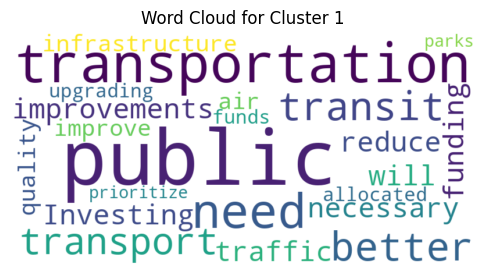

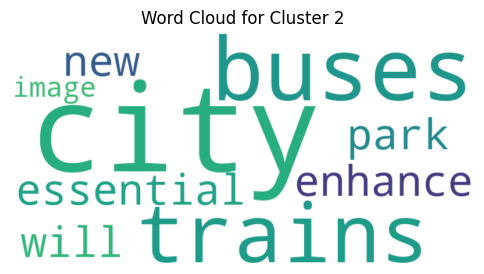

In [4]:
# Plot 2: Word Cloud for Each Cluster
from wordcloud import WordCloud

for cluster in range(num_clusters):
    cluster_comments = ' '.join(comments_df[comments_df['cluster'] == cluster]['comment'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_comments)

    plt.figure(figsize=(6, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()

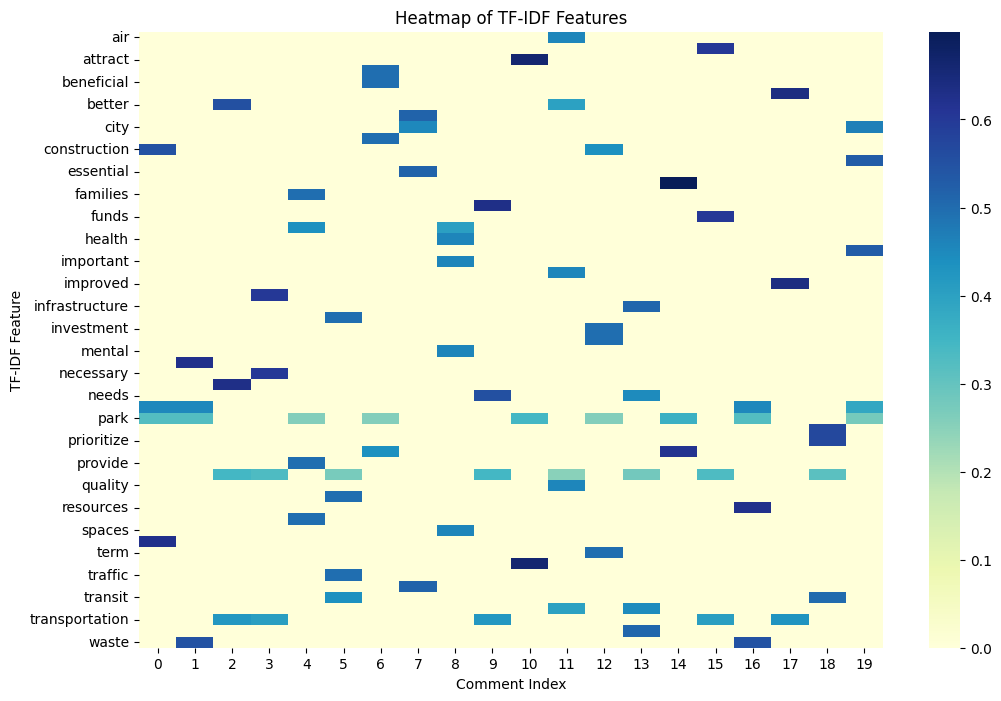

In [5]:
# Plot 3: Heatmap of TF-IDF Features
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df.T, cmap='YlGnBu', cbar=True)
plt.title('Heatmap of TF-IDF Features')
plt.xlabel('Comment Index')
plt.ylabel('TF-IDF Feature')
plt.show()

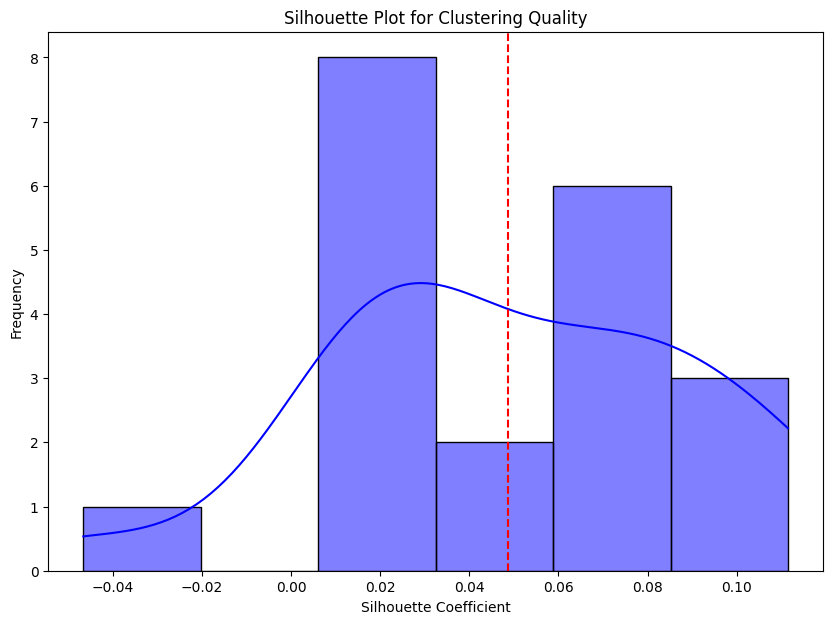

In [6]:
# Plot 4: Silhouette Plot for Clustering Quality
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_vals = silhouette_samples(X, clusters)
silhouette_avg = silhouette_score(X, clusters)

plt.figure(figsize=(10, 7))
sns.histplot(silhouette_vals, kde=True, color='blue')
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.title('Silhouette Plot for Clustering Quality')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Frequency')
plt.show()

# Automatic Summarization with Visualization and XAI

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
BartModel is using BartSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `layer_head_mask` not None. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Summary: The new park construction project has sparked a lot of debate. Supporters argue that it will provide a much-needed green space. Opponents claim that the funds could be better spent on public transportation improvements.


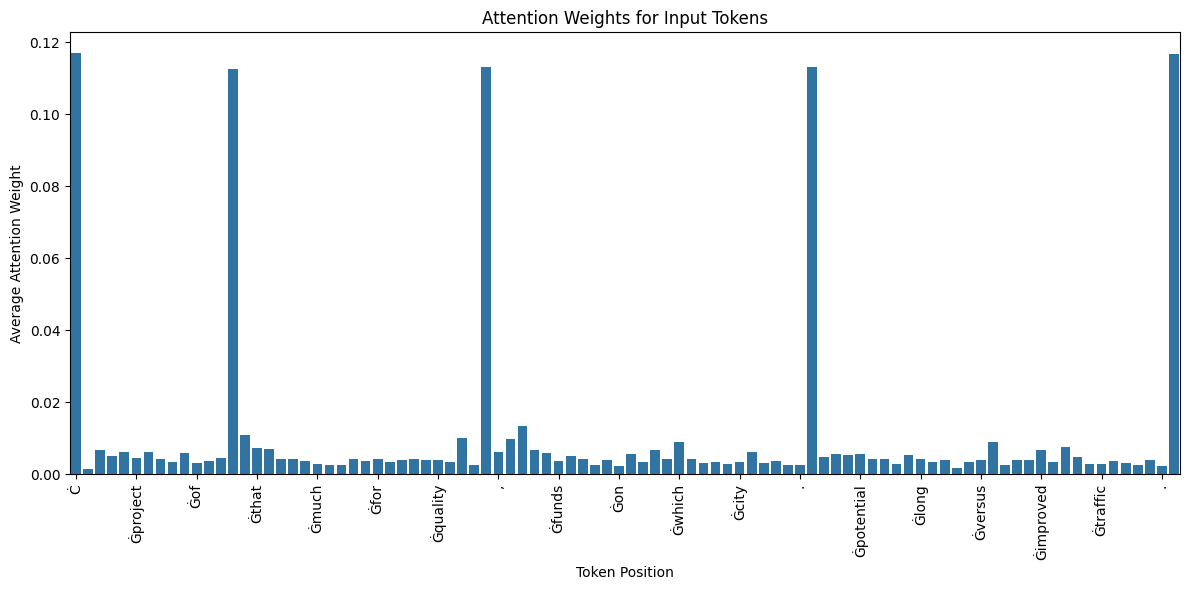


Most important tokens for summarization:
Ċ: 0.1169
Ċ: 0.1166
ĠHowever: 0.1133
ĠAdditional: 0.1130
ĠSupporters: 0.1127
Ġclaim: 0.0134
Ġargue: 0.0110
Ġlife: 0.0101
Ġopponents: 0.0097


In [7]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np


# Using a pre-trained model for summarization
model_name = "facebook/bart-large-cnn"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer)

# Example discussion topic (expanded text)
discussion_topic = """
The new park construction project has sparked a lot of debate. Supporters argue that it will provide a much-needed green space for recreation and improve the quality of life. However, opponents claim that the funds could be better spent on public transportation improvements, which are essential for the city's growth and sustainability. Additional arguments include the potential for increased tourism and long-term investment benefits versus the immediate need for improved transit infrastructure to reduce traffic and improve air quality.
"""

# Summarizing the topic
summary = summarizer(discussion_topic, max_length=50, min_length=25, do_sample=False)
print("Summary:", summary[0]['summary_text'])

# XAI: Attention-based explanation
def get_attention_weights(text, summary):
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = tokenizer(summary, return_tensors="pt")["input_ids"]

    with torch.no_grad():
        outputs = model(input_ids=inputs["input_ids"], decoder_input_ids=summary_ids, output_attentions=True)

    # Average attention weights across all layers and heads
    attention_weights = outputs.encoder_attentions[-1].mean(dim=(0, 1)).squeeze()
    return attention_weights.numpy()

attention_weights = get_attention_weights(discussion_topic, summary[0]['summary_text'])

# Ensure attention_weights is 1-dimensional
if attention_weights.ndim > 1:
    attention_weights = attention_weights.mean(axis=0)

# Visualize attention weights
tokens = tokenizer.tokenize(discussion_topic)
plt.figure(figsize=(12, 6))
sns.barplot(x=range(len(tokens)), y=attention_weights[:len(tokens)])
plt.title("Attention Weights for Input Tokens")
plt.xlabel("Token Position")
plt.ylabel("Average Attention Weight")
plt.xticks(range(0, len(tokens), 5), [tokens[i] for i in range(0, len(tokens), 5)], rotation=90)
plt.tight_layout()
plt.show()

# Print the most important tokens
importance_threshold = np.percentile(attention_weights, 90)  # Top 10% of attention weights
important_tokens = [(token, weight) for token, weight in zip(tokens, attention_weights) if weight > importance_threshold]
important_tokens.sort(key=lambda x: x[1], reverse=True)

print("\nMost important tokens for summarization:")
for token, weight in important_tokens:
    print(f"{token}: {weight:.4f}")

Stimulating Discussions

In [8]:
from transformers import pipeline

# Using a smaller pre-trained model for question generation
question_generator = pipeline("text-generation", model="distilgpt2", device = 0)

# Example analysis of current discussions
current_discussions = """
Current discussions are focused on the new park construction and the need for public transportation improvements. Additional points include the benefits of green spaces for mental health, the attraction of tourists, and the impact on air quality from better public transportation.
"""

# Generating questions
questions = question_generator(current_discussions, max_length=50, num_return_sequences=1)
for i, question in enumerate(questions):
    print(f"Question {i+1}: {question['generated_text']}")


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question 1: 
Current discussions are focused on the new park construction and the need for public transportation improvements. Additional points include the benefits of green spaces for mental health, the attraction of tourists, and the impact on air quality from better public transportation.






# Identification and Filtering of Toxic Comments with Visualization and XAI

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Comment: I support the new park construction. - Toxicity: toxic - Score: 0.0006
Comment: This is a stupid idea! - Toxicity: toxic - Score: 0.9299
Comment: The park project is idiotic and wasteful. - Toxicity: toxic - Score: 0.9524
Comment: Public transportation improvements are necessary. - Toxicity: toxic - Score: 0.0006
Comment: Why are we wasting money on this park? - Toxicity: toxic - Score: 0.0060
Comment: Public transit is a joke in this city. - Toxicity: toxic - Score: 0.0017
Comment: We need better leadership, not more parks. - Toxicity: toxic - Score: 0.0006
Comment: The park is a great idea and will help the community. - Toxicity: toxic - Score: 0.0006
Comment: Anyone who opposes this park is short-sighted. - Toxicity: toxic - Score: 0.0011
Comment: Better public transport can improve air quality. - Toxicity: toxic - Score: 0.0006


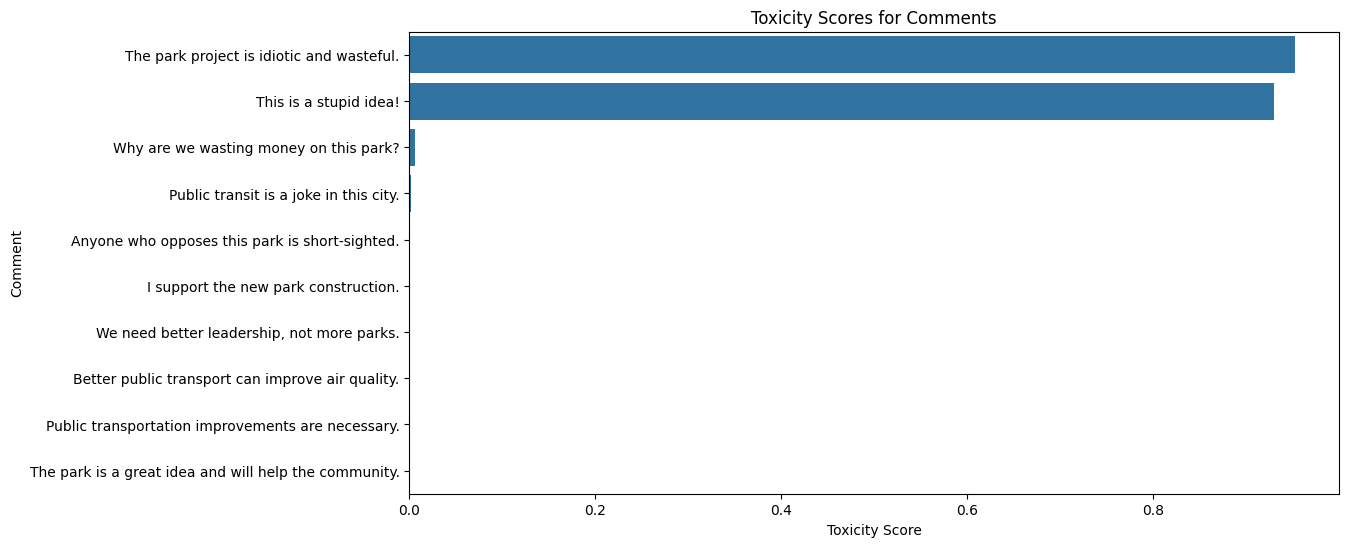

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from lime.lime_text import LimeTextExplainer

# Using a pre-trained model for toxicity detection
model_name = "unitary/toxic-bert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
toxicity_classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Example comments (expanded dataset)
comments = [
    "I support the new park construction.",
    "This is a stupid idea!",
    "The park project is idiotic and wasteful.",
    "Public transportation improvements are necessary.",
    "Why are we wasting money on this park?",
    "Public transit is a joke in this city.",
    "We need better leadership, not more parks.",
    "The park is a great idea and will help the community.",
    "Anyone who opposes this park is short-sighted.",
    "Better public transport can improve air quality."
]

# Checking comments for toxicity
results = toxicity_classifier(comments)
for comment, result in zip(comments, results):
    print(f"Comment: {comment} - Toxicity: {result['label']} - Score: {result['score']:.4f}")

# Visualization: Toxicity Scores
df = pd.DataFrame({'comment': comments, 'toxicity_score': [r['score'] for r in results]})
df = df.sort_values('toxicity_score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='toxicity_score', y='comment', data=df)
plt.title("Toxicity Scores for Comments")
plt.xlabel("Toxicity Score")
plt.ylabel("Comment")
plt.show()

# XAI: LIME Explainer
def predict_toxicity(texts):
    results = toxicity_classifier(texts)
    return np.array([[1 - r['score'], r['score']] for r in results])

explainer = LimeTextExplainer(class_names=["Non-toxic", "Toxic"])

# Explain the most toxic comment
most_toxic_comment = df.iloc[0]['comment']
exp = explainer.explain_instance(most_toxic_comment, predict_toxicity, num_features=6)
exp.show_in_notebook()

# Print the explanation
print("LIME Explanation for the most toxic comment:")
for feature, importance in exp.as_list():
    print(f"{feature}: {importance}")

# Visualization: Feature Importance
feature_importance = pd.DataFrame(exp.as_list(), columns=['feature', 'importance'])
feature_importance = feature_importance.sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title("Feature Importance for Toxicity Classification")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Explainability of AI Decisions

In [ ]:
!pip install lime

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Example data and model
X_train = np.array([[0, 1], [1, 1], [2, 0], [2, 2], [3, 1], [1, 0], [0, 2], [2, 1]])
y_train = np.array([0, 1, 0, 1, 1, 0, 0, 1])
model = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X_train)

# Custom prediction function to simulate probability scores
def predict_fn(data):
    cluster_assignments = model.predict(data)
    # Simulate probability scores with 1 for the assigned cluster and 0 for the others
    probabilities = np.zeros((data.shape[0], model.n_clusters))
    for i, cluster in enumerate(cluster_assignments):
        probabilities[i, cluster] = 1
    return probabilities

# Explaining predictions
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=['Feature 1', 'Feature 2'], class_names=[f'Cluster {i}' for i in range(model.n_clusters)], verbose=True, mode='classification')
instance = np.array([1, 2])
explanation = explainer.explain_instance(instance, predict_fn)
explanation.show_in_notebook()

# Plotting the clusters for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = model.labels_

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
for i in range(pca_df.shape[0]):
    plt.text(pca_df.PC1[i], pca_df.PC2[i], str(i))
plt.title('KMeans Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
!pip show lime

In [ ]:
!pip install lime

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer